In [1]:
# What GPU do I have
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Mon Aug  8 10:11:49 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow as tf 
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras import *
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import set_random_seed

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import *
from sklearn.preprocessing import MinMaxScaler

In [4]:
import keras
from keras.layers import Dropout, MaxPooling1D, Dense, Flatten, SimpleRNN, LSTM, Bidirectional

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
X_train = pd.read_csv("/content/drive/My Drive/Thesis/Data/Daily/X_train_days.csv", sep = ';', encoding = 'latin1', header = None)

In [7]:
y_train = pd.read_csv("/content/drive/My Drive/Thesis/Data/Daily/y_train_days.csv", sep = ';', encoding = 'latin1', header = None)

In [8]:
X_test = pd.read_csv("/content/drive/My Drive/Thesis/Data/Daily/X_test_days.csv", sep = ';', encoding = 'latin1', header = None)

In [9]:
y_test = pd.read_csv("/content/drive/My Drive/Thesis/Data/Daily/y_test_days.csv", sep = ';', encoding = 'latin1', header = None)

In [10]:
y_train = y_train[X_train.sum(axis = 1) != 0]
X_train = X_train[X_train.sum(axis = 1) != 0]
# Remove all rows which have a sum of zero accross the row


In [11]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,76.547,77.105,57.013,61.165,71.743,57.635,69.526,77.068,50.457,76.370,...,21.379,18.585,26.847,18.918,18.373,19.611,15.597,21.956,14.388,19.935
1,16.698,25.304,26.144,19.920,26.479,27.520,18.752,28.548,27.299,26.875,...,20.035,28.290,16.839,25.464,24.081,20.975,18.255,18.865,20.206,19.971
2,79.455,84.370,84.983,71.558,71.415,77.090,80.046,79.847,72.606,73.568,...,49.615,53.788,59.314,57.472,56.666,53.710,60.843,54.815,57.616,55.197
3,41.988,54.490,41.565,38.495,39.587,45.916,47.105,52.256,47.014,52.357,...,25.538,22.859,27.720,26.456,28.489,26.543,26.942,29.154,26.173,29.002
4,62.019,67.301,54.631,43.959,46.694,58.830,64.025,67.007,57.345,55.390,...,30.065,33.142,33.906,28.915,29.738,24.141,27.045,33.828,29.308,33.041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,3.184,3.133,2.956,2.054,2.012,2.625,1.853,2.158,2.805,3.574,...,2.480,1.378,1.251,1.751,2.049,2.465,1.754,2.670,1.683,2.941
171,37.826,46.573,44.091,30.806,28.866,36.888,49.958,52.345,47.276,45.743,...,14.921,10.818,15.855,19.459,13.090,15.826,15.642,18.089,12.467,23.238
172,0.925,0.920,0.968,0.972,0.926,0.954,0.912,0.926,0.908,0.974,...,0.011,0.000,0.000,0.000,0.030,0.000,0.000,0.020,0.000,0.000
173,4.300,3.782,2.383,2.976,4.449,3.227,2.849,2.651,2.879,3.912,...,2.804,2.603,2.741,2.676,1.624,1.631,1.890,2.682,2.442,2.121


In [12]:
# Min max scaling (accross rows)
y_train
np.sum(y_train) + np.sum(y_test)
np.sum(y_train==0) + np.sum(y_test==0)
len(y_test)

59

In [13]:
X_train_scaled_m_m = X_train.sub(X_train.min(axis=1), axis=0).divide(X_train.max(axis=1).sub(X_train.min(axis=1)), axis=0)

X_test_scaled_m_m = X_test.sub(X_test.min(axis=1), axis=0).divide(X_test.max(axis=1).sub(X_test.min(axis=1)), axis=0)

In [14]:
# Scaling data for every day (accrosss columns)

In [15]:
X_train_scaled_m_m.isna().sum().sum()
# No nas, this is good

0

In [16]:
#from sklearn.preprocessing import MinMaxScaler

In [17]:
# scaler = MinMaxScaler()
# #scaler.fit(np.array(X_train_scaled_m_m))
# X_train_scaled_m_m_mm = scaler.fit_transform(X_train_scaled_m_m)
# X_test_scaled_m_m_mm = scaler.fit_transform(X_test_scaled_m_m)

In [18]:
#np.sum(np.isnan(X_train_scaled_m_m_mm)) # Still no nas

In [19]:
# BASE CASE
X_train_scaled_m_m.iloc[:,-2:]

,118,119
0,0.013037,0.085499
1,0.224173,0.215393
2,0.238748,0.171460
3,0.111776,0.190849
4,0.092755,0.156405
...,...,...
170,0.145903,0.529089
171,0.038690,0.291406
172,0.000000,0.000000
173,0.225349,0.150698


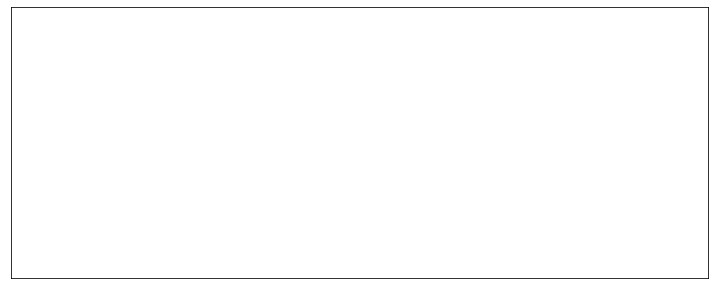

In [20]:
plt.figure(figsize = (12.5,5))
plt.plot(X_train_scaled_m_m[y_train == 0].mean(axis=0), linewidth = 5)
plt.plot(X_train_scaled_m_m[y_train == 1].mean(axis=0), linewidth = 5)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
#plt.axis("off")
plt.savefig("LSTM_data.png", bbox_inches='tight')

In [21]:
ja_ratio_original = X_train_scaled_m_m.iloc[:,0:31].sum(axis = 1) / X_train_scaled_m_m.iloc[:,-30:].sum(axis = 1)
ja_ratio = X_train_scaled_m_m.iloc[:,0:31].sum(axis = 1) / X_train_scaled_m_m.iloc[:,-30:].sum(axis = 1)
ja_ratio = np.array(ja_ratio)
ja_ratio = ja_ratio.reshape(-1,1)
mask = (np.isinf(ja_ratio) == False) & (ja_ratio < 8)
ja_ratio = ja_ratio[mask]
scaler = MinMaxScaler()
#scaler.fit(ja_ratio.reshape(-1,1))
#ja_ratio = scaler.transform(ja_ratio.reshape(-1,1))
y_train = np.array(y_train)
y_train_lr = y_train[mask]
ja_ratio.shape

(169,)

In [22]:
ja_ratio_original.shape
y_train.shape

(174, 1)

In [23]:
y_train_lr = y_train_lr.ravel()

In [24]:
lr = LogisticRegression()
lr.fit(ja_ratio.reshape(-1, 1), y_train_lr)

LogisticRegression()

In [25]:
lr.predict(np.array(1).reshape(-1, 1))

array([0.])

In [26]:
y_train_lr

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0.])

In [27]:
lr.predict(ja_ratio.reshape(-1, 1))

array([1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.])

In [28]:
lr.coef_
lr.intercept_
from matplotlib.patches import Patch

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

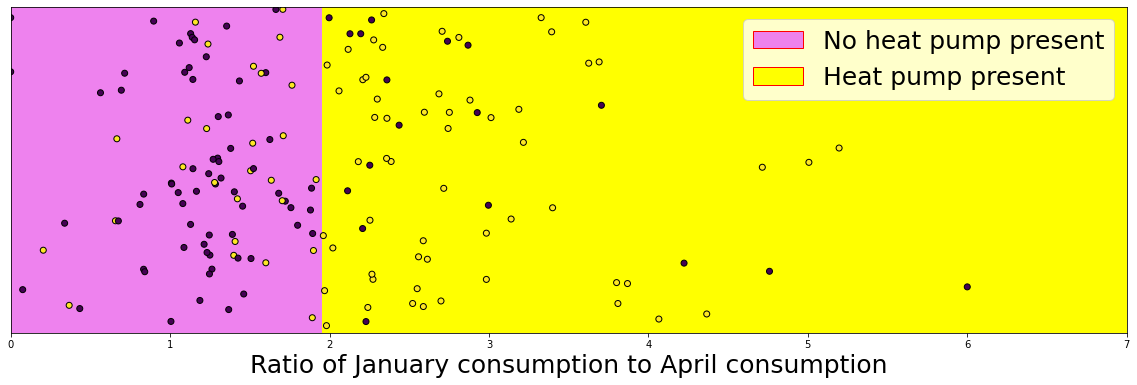

In [29]:
# Train set plotting
#y_values 
line_x  = np.linspace(0,10)
line = lr.coef_*line_x + lr.intercept_
#plt.plot(line_x, line)
xx_train, yy_train = np.meshgrid(np.arange(0, 7.1, 0.1),
                                 np.arange(-3.1, 3.1, 0.1))
Z_train = lr.predict(xx_train.reshape(-1,1))
Z_train = Z_train.reshape(xx_train.shape)
plt.figure(figsize = (20,6))
plt.contourf(xx_train, yy_train, Z_train, levels = 1, colors = ["violet","yellow"])
plt.scatter(ja_ratio, np.random.uniform(-3,3,len(ja_ratio)), c = y_train_lr, edgecolor = "k")
patches = [ Patch(facecolor='violet', edgecolor='r',
                          label='No heat pump present'),
            Patch(facecolor='yellow', edgecolor='r',
                          label='Heat pump present')]
plt.legend(patches, ["No heat pump present", "Heat pump present"], fontsize = 25)
plt.xlabel("Ratio of January consumption to April consumption", fontsize = 25)
ax = plt.gca()
ax.get_yaxis().set_visible(False)
#plt.axis("off")
#plt.xlim(0,10)
line_x

In [30]:
ja_ratio_test = X_test_scaled_m_m.iloc[:,0:31].sum(axis = 1) / X_test_scaled_m_m.iloc[:,-30:].sum(axis = 1)
ja_ratio_test
ja_ratio_test = np.array(ja_ratio_test)
ja_ratio_test = ja_ratio_test.reshape(-1,1)
#ja_ratio_test = scaler.transform(ja_ratio_test.reshape(-1,1))
# y_train = np.array(y_train)
# y_train_lr = y_train[mask]
# ja_ratio.shape
ja_ratio_test

array([[1.61040937],
       [2.27849923],
       [0.90639693],
       [1.52830437],
       [2.28916781],
       [2.25585576],
       [1.15947925],
       [3.93857195],
       [1.82176728],
       [0.24114767],
       [0.94411263],
       [1.06731557],
       [1.34524567],
       [1.34459423],
       [4.55751928],
       [0.70215733],
       [2.86765373],
       [1.66206724],
       [1.75077615],
       [3.40075679],
       [1.82747006],
       [4.61930675],
       [0.72960614],
       [1.90857886],
       [3.35472813],
       [5.63191776],
       [1.2500649 ],
       [1.69355436],
       [3.33456243],
       [1.73739008],
       [2.77890754],
       [2.61501211],
       [1.5830037 ],
       [0.        ],
       [1.60021105],
       [1.41395992],
       [0.91707053],
       [3.03210353],
       [1.4795337 ],
       [3.722092  ],
       [2.28237161],
       [1.00225215],
       [0.48356949],
       [2.12785614],
       [0.02334763],
       [1.47358646],
       [1.3042919 ],
       [0.897

In [31]:
np.sum(lr.predict(np.array(ja_ratio).reshape(-1,1)) == np.array(y_train_lr).ravel()) / len(ja_ratio)

0.7337278106508875

In [32]:
np.sum((lr.predict(ja_ratio_test) == np.array(y_test).ravel()) )/ len(ja_ratio_test)


0.8135593220338984

In [33]:
# Test set plotting

No handles with labels found to put in legend.


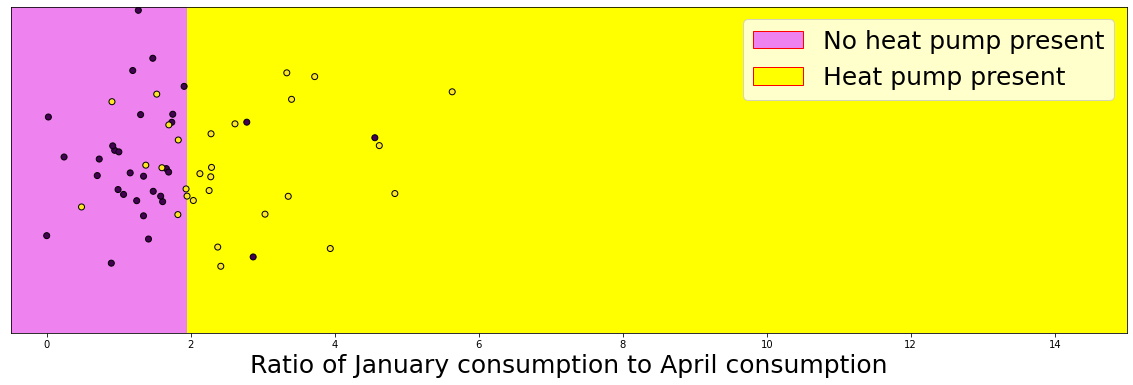

In [34]:
#  Test set plotting
#y_values 
line_x  = np.linspace(0,10)
line = lr.coef_*line_x + lr.intercept_
#plt.plot(line_x, line)
xx_train, yy_train = np.meshgrid(np.arange(-0.5, 15.1, 0.1),
                                 np.arange(-3.1, 3.1, 0.1))
Z_train = lr.predict(xx_train.reshape(-1,1))
Z_train = Z_train.reshape(xx_train.shape)
plt.figure(figsize = (20,6))
plt.contourf(xx_train, yy_train, Z_train, levels = 1, colors = ["violet","yellow"])
plt.scatter(ja_ratio_test, np.random.randn(len(ja_ratio_test)), c = y_test, edgecolor = "k")
plt.legend()
#plt.xlim(0,10)
patches = [ Patch(facecolor='violet', edgecolor='r',
                          label='No heat pump present'),
            Patch(facecolor='yellow', edgecolor='r',
                          label='Heat pump present')]
plt.legend(patches, ["No heat pump present", "Heat pump present"], fontsize = 25)
plt.xlabel("Ratio of January consumption to April consumption" , fontsize = 25)
ax = plt.gca()
ax.get_yaxis().set_visible(False)

P-R AUC 0.8107443006656444
ROC AUC 0.8410138248847926


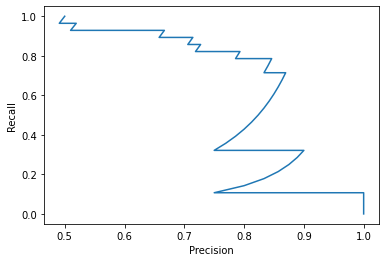

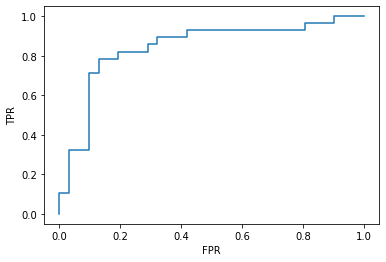

In [35]:

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

probs = lr.predict_proba(ja_ratio_test)
probs = probs[:,1]
y_test_pr = y_test.iloc[:,0]#[np.isnan(probs)==False]
#probs = probs[np.isnan(probs)==False]
precisions, recalls, threshholds = precision_recall_curve(y_test_pr, probs)
plt.figure()
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
print("P-R AUC", auc( recalls, precisions))
fpr, tpr, thresholds = roc_curve(y_test_pr, probs, pos_label=1)
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
print("ROC AUC", auc( fpr, tpr))

In [36]:
# COMBINED

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
me_ratio_original = pd.read_csv("/content/drive/My Drive/Thesis/NeuralNetworks/LSTM/Hourly/me_ratio_train.csv", sep = ';', encoding = 'latin1', header = None)

In [39]:
me_ratio_original
X_train

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,76.547,77.105,57.013,61.165,71.743,57.635,69.526,77.068,50.457,76.370,...,21.379,18.585,26.847,18.918,18.373,19.611,15.597,21.956,14.388,19.935
1,16.698,25.304,26.144,19.920,26.479,27.520,18.752,28.548,27.299,26.875,...,20.035,28.290,16.839,25.464,24.081,20.975,18.255,18.865,20.206,19.971
2,79.455,84.370,84.983,71.558,71.415,77.090,80.046,79.847,72.606,73.568,...,49.615,53.788,59.314,57.472,56.666,53.710,60.843,54.815,57.616,55.197
3,41.988,54.490,41.565,38.495,39.587,45.916,47.105,52.256,47.014,52.357,...,25.538,22.859,27.720,26.456,28.489,26.543,26.942,29.154,26.173,29.002
4,62.019,67.301,54.631,43.959,46.694,58.830,64.025,67.007,57.345,55.390,...,30.065,33.142,33.906,28.915,29.738,24.141,27.045,33.828,29.308,33.041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,3.184,3.133,2.956,2.054,2.012,2.625,1.853,2.158,2.805,3.574,...,2.480,1.378,1.251,1.751,2.049,2.465,1.754,2.670,1.683,2.941
171,37.826,46.573,44.091,30.806,28.866,36.888,49.958,52.345,47.276,45.743,...,14.921,10.818,15.855,19.459,13.090,15.826,15.642,18.089,12.467,23.238
172,0.925,0.920,0.968,0.972,0.926,0.954,0.912,0.926,0.908,0.974,...,0.011,0.000,0.000,0.000,0.030,0.000,0.000,0.020,0.000,0.000
173,4.300,3.782,2.383,2.976,4.449,3.227,2.849,2.651,2.879,3.912,...,2.804,2.603,2.741,2.676,1.624,1.631,1.890,2.682,2.442,2.121


In [40]:
me_ratio_original.drop(columns = 0, inplace = True)
me_ratio_original.rename(columns = {1:"me_ratio"}, inplace = True)
me_ratio_original["ja_ratio"] = ja_ratio_original
combined = me_ratio_original

In [41]:
pd.set_option('display.max_rows', 200)
combined

,me_ratio,ja_ratio
0,2.335063,3.625534
1,0.475567,1.158567
2,0.508204,2.587746
3,0.577968,2.983596
4,1.263999,2.706129
5,0.423026,2.594616
6,0.738585,2.253513
7,0.320207,2.868593
8,0.931892,2.333174
9,0.418953,3.800312


In [42]:
mask = (np.isinf(combined.me_ratio) == False) & (np.isinf(combined.ja_ratio) == False) & (np.isnan(combined.me_ratio) == False) & (np.isnan(combined.ja_ratio) == False) & (combined.ja_ratio < 8) 
combined = combined[mask]
y_train_c = y_train[mask]
len(combined)



168

In [43]:
scaler = MinMaxScaler()
scaler.fit(combined)
combined_scaled = scaler.transform(combined)
combined_scaled

array([[0.70587247, 0.60425574],
       [0.12014442, 0.19309452],
       [0.13042472, 0.43129096],
       [0.15239991, 0.49726601],
       [0.36849505, 0.45102155],
       [0.10359434, 0.43243606],
       [0.20299317, 0.37558544],
       [0.07120696, 0.47809883],
       [0.2638835 , 0.38886229],
       [0.10231132, 0.63338534],
       [0.13164278, 0.13515306],
       [0.13084463, 0.31530479],
       [0.07116387, 0.70392149],
       [0.59838899, 0.34322549],
       [0.07868845, 0.28705761],
       [0.16649292, 0.36339267],
       [0.39186641, 0.33011914],
       [0.14945234, 0.46852624],
       [0.50890467, 0.38054939],
       [0.05221296, 0.28144472],
       [0.04023631, 0.29994145],
       [0.11319534, 0.3268193 ],
       [0.30695753, 0.83443612],
       [0.04857702, 0.18512917],
       [0.278082  , 0.39332149],
       [0.06396974, 0.13892033],
       [0.        , 0.61753164],
       [0.15674267, 0.32813218],
       [0.20401958, 0.64478851],
       [0.1438816 , 0.31928264],
       [0.

In [44]:
lrc = LogisticRegression()
lrc.fit(combined_scaled, y_train_c)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [45]:
combined.describe()

,me_ratio,ja_ratio
count,168.000000,168.000000
mean,0.674514,1.961560
std,0.564256,1.046713
min,0.094148,0.000000
25%,0.319006,1.240838
50%,0.481871,1.740029
75%,0.836523,2.528246
max,3.268822,6.000000


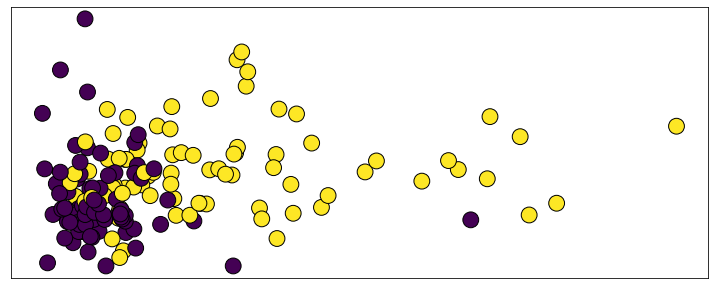

In [46]:
# Train set plotting
#y_values 
#line_x  = np.linspace(0,10)
#line = lr.coef_*line_x + lr.intercept_
#plt.plot(line_x, line)
#xx_train, yy_train = np.meshgrid(np.arange(0, 1.1, 0.01),
#                                 np.arange(0, 1.1, 0.01))
#Z_train = lrc.predict(np.c_[xx_train.ravel(), yy_train.ravel()])
#Z_train = Z_train.reshape(xx_train.shape)
plt.figure(figsize = (12.5,5))
#plt.contourf(xx_train, yy_train, Z_train, levels = 1, colors = ["violet","yellow"])
plt.scatter(combined_scaled[:,0], combined_scaled[:,1], c = y_train_c, edgecolor = "k", s = 250)
patches = [ Patch(facecolor='violet', edgecolor='r',
                          label='No heat pump present'),
            Patch(facecolor='yellow', edgecolor='r',
                          label='Heat pump present')]
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
#plt.axis("off")
plt.savefig("lr_data.png", bbox_inches='tight')
#plt.legend(patches, ["No heat pump present", "Heat pump present"], fontsize = 25)
#plt.xlabel("Ratio of morning consumption to evening consumption, scaled (min-max)", fontsize = 15)
#plt.ylabel("Ratio of January consumption to April consumption, scaled (min-max)", fontsize = 15)

Text(0, 0.5, 'Ratio of January consumption to April consumption, scaled (min-max)')

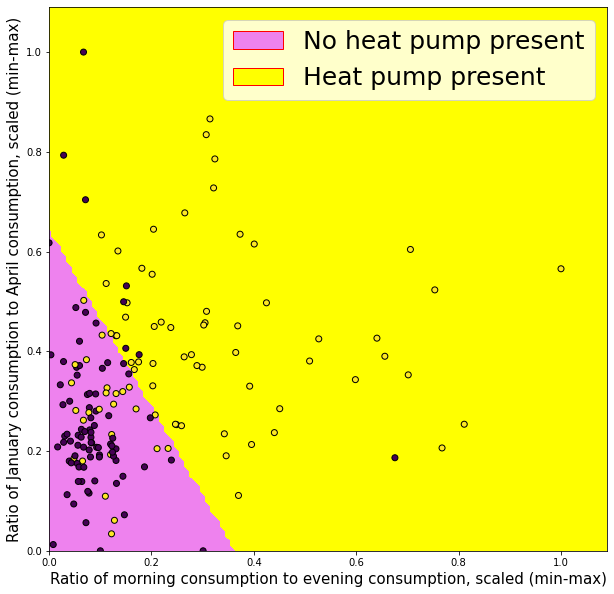

In [47]:
# Train set plotting
#y_values 
line_x  = np.linspace(0,10)
line = lr.coef_*line_x + lr.intercept_
#plt.plot(line_x, line)
xx_train, yy_train = np.meshgrid(np.arange(0, 1.1, 0.01),
                                 np.arange(0, 1.1, 0.01))
Z_train = lrc.predict(np.c_[xx_train.ravel(), yy_train.ravel()])
Z_train = Z_train.reshape(xx_train.shape)
plt.figure(figsize = (10,10))
plt.contourf(xx_train, yy_train, Z_train, levels = 1, colors = ["violet","yellow"])
plt.scatter(combined_scaled[:,0], combined_scaled[:,1], c = y_train_c, edgecolor = "k")
patches = [ Patch(facecolor='violet', edgecolor='r',
                          label='No heat pump present'),
            Patch(facecolor='yellow', edgecolor='r',
                          label='Heat pump present')]
plt.legend(patches, ["No heat pump present", "Heat pump present"], fontsize = 25)
plt.xlabel("Ratio of morning consumption to evening consumption, scaled (min-max)", fontsize = 15)
plt.ylabel("Ratio of January consumption to April consumption, scaled (min-max)", fontsize = 15)

In [48]:
me_ratio_test = pd.read_csv("/content/drive/My Drive/Thesis/NeuralNetworks/LSTM/Hourly/me_ratio_test.csv", sep = ';', encoding = 'latin1', header = None)

In [49]:
me_ratio_test.drop(columns = 0, inplace = True)
me_ratio_test.rename(columns = {1:"me_ratio"}, inplace = True)
me_ratio_test["ja_ratio_test"] = ja_ratio_test
combined_test = me_ratio_test
combined_test_scaled = scaler.transform(me_ratio_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- ja_ratio_test
Feature names seen at fit time, yet now missing:
- ja_ratio

  warnings.warn(message, FutureWarning)


In [50]:
np.min(combined_test_scaled[:,1])

0.0

Text(0, 0.5, 'Ratio of January consumption to April consumption, scaled (min-max)')

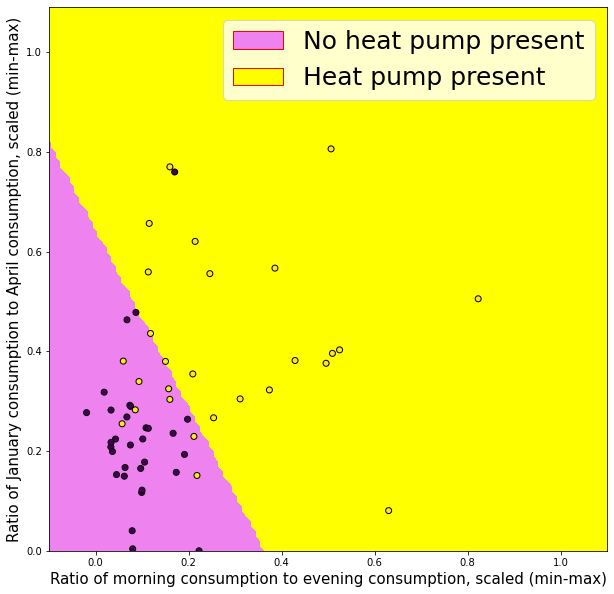

In [51]:
# Train set plotting
#y_values 
line_x  = np.linspace(0,10)
line = lr.coef_*line_x + lr.intercept_
#plt.plot(line_x, line)
xx_train, yy_train = np.meshgrid(np.arange(-0.1, 1.1, 0.01),
                                 np.arange(0, 1.1, 0.01))
Z_train = lrc.predict(np.c_[xx_train.ravel(), yy_train.ravel()])
Z_train = Z_train.reshape(xx_train.shape)
plt.figure(figsize = (10,10))
plt.contourf(xx_train, yy_train, Z_train, levels = 1, colors = ["violet","yellow"])
plt.scatter(combined_test_scaled[:,0], combined_test_scaled[:,1], c = y_test, edgecolor = "k")
patches = [ Patch(facecolor='violet', edgecolor='r',
                          label='No heat pump present'),
            Patch(facecolor='yellow', edgecolor='r',
                          label='Heat pump present')]
plt.legend(patches, ["No heat pump present", "Heat pump present"], fontsize = 25)
plt.xlabel("Ratio of morning consumption to evening consumption, scaled (min-max)", fontsize = 15)
plt.ylabel("Ratio of January consumption to April consumption, scaled (min-max)", fontsize = 15)

In [52]:
print(len(lrc.predict(combined_scaled)))
len(np.array(y_train).ravel())

168


174

In [53]:
np.sum((lrc.predict(combined_scaled) == np.array(y_train_c).ravel()) )/ len(combined_scaled)

0.7976190476190477

In [54]:
np.sum((lrc.predict(combined_test_scaled) == np.array(y_test).ravel()) )/ len(combined_test_scaled)

0.8305084745762712

P-R AUC 0.9196481028437483
ROC AUC 0.9308755760368663


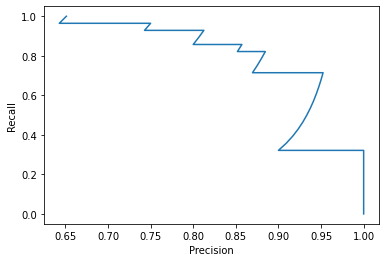

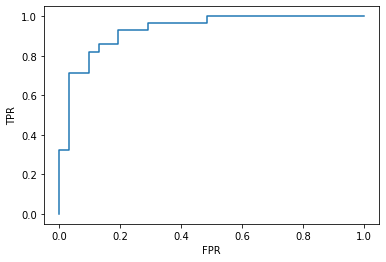

In [56]:
probs = lrc.predict_proba(combined_test_scaled)
probs = probs[:,1]
y_test_pr = y_test.iloc[:,0]#[np.isnan(probs)==False]
#probs = probs[np.isnan(probs)==False]
precisions, recalls, threshholds = precision_recall_curve(y_test_pr, probs)
plt.figure()
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
print("P-R AUC", auc( recalls, precisions))
fpr, tpr, thresholds = roc_curve(y_test_pr, probs, pos_label=1)
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
print("ROC AUC", auc( fpr, tpr))

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [ ]:
n_timesteps, n_features, n_outputs = X_train.shape[1], 1, 1

In [ ]:
n_timesteps

120

In [ ]:


# Only return sequences if next layer is also LSTM!!
model_i = Sequential()
model_i.add(LSTM(128, input_shape=(n_timesteps,n_features))) # This number 8 ballpark
model_i.add(Dropout(0))
model_i.add(Dense(128, activation='relu')) # This number 8 ballpark
model_i.add(Dense(n_outputs, activation='sigmoid'))


In [ ]:
#opt = Adam(lr= 0.0001)

In [ ]:
model_i.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=METRICS)

In [ ]:
model_i.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 128)               66560     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 83,201
Trainable params: 83,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
verbose, epochs, batch_size = 1, 300, 25

In [ ]:
np.array(X_train).shape

(174, 120)

In [ ]:
np.sum(np.isnan(X_train_scaled_m_m)) # This should be zero otherwise the neural network shall not work

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

In [ ]:
# Early stopping and saving

In [ ]:
!pip install h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
from tensorflow.keras.models import load_model

In [ ]:
es = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 50)

In [ ]:
mc = ModelCheckpoint('/content/drive/My Drive/Thesis/NeuralNetworks/LSTM/Daily/best_untuned_model_nomm.h5', monitor = "val_loss", mode = "min", save_best_only = True)

In [ ]:
%%time
history_i = model_i.fit(np.array(X_train_scaled_m_m), y_train, epochs=epochs, verbose=verbose, batch_size = batch_size, validation_split=0.1, callbacks = [es, mc])

Epoch 1/300
7/7 [==============================] - 5s 350ms/step - loss: 0.6882 - tp: 5.0000 - fp: 6.0000 - tn: 71.0000 - fn: 74.0000 - accuracy: 0.4872 - precision: 0.4545 - recall: 0.0633 - auc: 0.6017 - prc: 0.5459 - val_loss: 0.6544 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 11.0000 - val_fn: 5.0000 - val_accuracy: 0.6667 - val_precision: 0.5000 - val_recall: 0.1667 - val_auc: 0.7292 - val_prc: 0.4825
Epoch 2/300
7/7 [==============================] - 0s 22ms/step - loss: 0.6754 - tp: 11.0000 - fp: 9.0000 - tn: 68.0000 - fn: 68.0000 - accuracy: 0.5064 - precision: 0.5500 - recall: 0.1392 - auc: 0.6953 - prc: 0.6415 - val_loss: 0.6373 - val_tp: 2.0000 - val_fp: 1.0000 - val_tn: 11.0000 - val_fn: 4.0000 - val_accuracy: 0.7222 - val_precision: 0.6667 - val_recall: 0.3333 - val_auc: 0.7569 - val_prc: 0.6311
Epoch 3/300
7/7 [==============================] - 0s 23ms/step - loss: 0.6539 - tp: 43.0000 - fp: 13.0000 - tn: 64.0000 - fn: 36.0000 - accuracy: 0.6859 - precision: 0.7679 - reca

In [ ]:
# load the saved model
saved_model = load_model('/content/drive/My Drive/Thesis/NeuralNetworks/LSTM/Daily/best_untuned_model_nomm.h5')

In [ ]:
saved_model.evaluate(X_test_scaled_m_m, y_test)

2/2 [==============================] - 1s 10ms/step - loss: 0.3628 - tp: 26.0000 - fp: 7.0000 - tn: 24.0000 - fn: 2.0000 - accuracy: 0.8475 - precision: 0.7879 - recall: 0.9286 - auc: 0.9199 - prc: 0.9038


[0.36278507113456726,
 26.0,
 7.0,
 24.0,
 2.0,
 0.8474576473236084,
 0.7878788113594055,
 0.9285714030265808,
 0.9199309349060059,
 0.903789222240448]

In [ ]:
# TUNING STARTS HERE

In [58]:
# Gotta install bayes_opt every time
!pip install keras
!pip install bayesian-optimization
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11685 sha256=71e263275c0aea684ef45973ba340206bf2bca17e83e003d0a9ccb009950e5ef
  Stored in directory: /root/.cache/pip/wheels/fd/9b/71/f127d694e02eb40bcf18c7ae9613b88a6be4470f57a8528c5b
Successfully built bayesian-optimization


In [ ]:
# Make scorer accuracy
#score_acc = make_scorer(accuracy_score)

In [ ]:
# def nn_cl_bo(neurons, activation, optimizer, learning_rate, batch_size, dropout_rate, epochs):
  
#   optimizerL = ['SGD', 'Adam', 'RMSprop']
#   optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),'RMSprop':RMSprop(lr=learning_rate)}
#   activationL = ['relu', 'sigmoid', 'softmax', 'selu']
#   neurons = round(neurons)
#   activation = activationL[int(np.ceil(activation))]
#   optimizer = optimizerD[optimizerL[int(np.ceil(optimizer))]]
#   batch_size = round(batch_size)
#   epochs = round(epochs)
  
#   def nn_cl_fun():
#     nn = Sequential()
#     nn.add(LSTM(neurons, input_shape=(120,1))) #nn.add(LSTM(neurons, input_shape=(n_timesteps,n_features))) 
#     nn.add(Dropout(dropout_rate))
#     nn.add(Dense(neurons, activation= activation)) 
#     nn.add(Dense(1, activation='sigmoid'))
#     nn.compile(optimizer= optimizer ,loss='binary_crossentropy', metrics=METRICS)
#     return nn
#   es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
#   nn = KerasClassifier(build_fn = nn_cl_fun, epochs = 100, batch_size = round(batch_size), verbose = 0)

#   kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 123)
#   score = cross_val_score(nn, X_train_scaled_m_m_mm, y_train, scoring = score_acc, cv = kfold, fit_params={'callbacks':[es]}).mean()
#   return score

In [ ]:
# params_nn = {'neurons' : (50,500), 
#              "activation" : (0,3),
#              "optimizer" : (0,2), 
#              "learning_rate" : (0.01,1), 
#              "batch_size" : (10, len(X_train)), 
#              "dropout_rate" : (0.01,0.3),
#              "epochs" : (20,150)}

In [ ]:
# nn_bo = BayesianOptimization(nn_cl_bo, params_nn, random_state = 123)

In [ ]:
# %%time
# nn_bo.maximize(init_points = 25, n_iter = 4)

In [ ]:
# nn_bo.max

In [ ]:
# int(np.ceil(0.1))

In [ ]:
# GRID SEARCH

In [60]:
#!pip install scikeras
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [ ]:
model_i = Sequential()
model_i.add(LSTM(128, input_shape=(n_timesteps,n_features))) # This number 8 ballpark
model_i.add(Dropout(0.3))
model_i.add(Dense(128, activation='relu')) # This number 8 ballpark
model_i.add(Dense(n_outputs, activation='sigmoid'))

In [ ]:
model_i.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 128)               66560     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 dense_13 (Dense)            (None, 1)                 129       
                                                                 
Total params: 83,201
Trainable params: 83,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def create_model(neurons, optimizer, learning_rate, activation, dropout_rate, LSTM_layers):
  opt_D = {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate), 'RMSprop': RMSprop(lr=learning_rate)}
  opt = opt_D[optimizer]
  nn = Sequential()
  for i in np.arange(0, LSTM_layers):
    if i < LSTM_layers - 1:
      nn.add(LSTM(neurons, input_shape=(120,1), return_sequences= True))
      nn.add(Dropout(dropout_rate))
    if i == LSTM_layers - 1:
        nn.add(LSTM(neurons, input_shape=(120,1), return_sequences= False))
        nn.add(Dropout(dropout_rate))
  nn.add(Dense(neurons, activation = activation )) 
  nn.add(Dense(1, activation='sigmoid'))
  nn.compile(optimizer= opt, loss='binary_crossentropy', metrics= ["accuracy"])
  return nn

In [ ]:
create_model(neurons = 128, optimizer = "Adam", learning_rate = 0.001, activation = "relu", dropout_rate = 0, LSTM_layers = 1).summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 128)               66560     
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 128)               16512     
                                                                 
 dense_15 (Dense)            (None, 1)                 129       
                                                                 
Total params: 83,201
Trainable params: 83,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
create_model(neurons = 128, optimizer = "Adam", learning_rate = 0.01, activation = "relu", dropout_rate = 0.1, LSTM_layers = 2).summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 120, 128)          66560     
                                                                 
 dropout_9 (Dropout)         (None, 120, 128)          0         
                                                                 
 lstm_10 (LSTM)              (None, 128)               131584    
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               16512     
                                                                 
 dense_17 (Dense)            (None, 1)                 129       
                                                                 
Total params: 214,785
Trainable params: 214,785
Non-tr

In [ ]:
es1 = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 20)
mc1 = ModelCheckpoint('/content/drive/My Drive/Thesis/NeuralNetworks/LSTM/Daily/best_tuned_model_nomm_1.h5', monitor = "val_loss", mode = "min", save_best_only = True)


In [ ]:
model = KerasClassifier(build_fn=create_model, epochs = 300, verbose = 0, callbacks = [es1, mc1])

In [ ]:
model_f_test = create_model(neurons = 128, optimizer = "Adam", learning_rate = 0.001, activation = "relu", dropout_rate = 0, LSTM_layers = 1)

In [ ]:
model_f_test.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 128)               66560     
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               16512     
                                                                 
 dense_19 (Dense)            (None, 1)                 129       
                                                                 
Total params: 83,201
Trainable params: 83,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_f_test = model_f_test.fit(np.array(X_train_scaled_m_m), y_train, epochs=epochs, verbose=verbose, batch_size = batch_size, validation_split=0.1, callbacks = [es1, mc1])

Epoch 1/300
7/7 [==============================] - 3s 191ms/step - loss: 0.6952 - accuracy: 0.5128 - val_loss: 0.6659 - val_accuracy: 0.6111
Epoch 2/300
7/7 [==============================] - 0s 15ms/step - loss: 0.6857 - accuracy: 0.4936 - val_loss: 0.6707 - val_accuracy: 0.6111
Epoch 3/300
7/7 [==============================] - 0s 20ms/step - loss: 0.6807 - accuracy: 0.5962 - val_loss: 0.6525 - val_accuracy: 0.6667
Epoch 4/300
7/7 [==============================] - 0s 17ms/step - loss: 0.6620 - accuracy: 0.7179 - val_loss: 0.6040 - val_accuracy: 0.7778
Epoch 5/300
7/7 [==============================] - 0s 13ms/step - loss: 0.6405 - accuracy: 0.7500 - val_loss: 0.6194 - val_accuracy: 0.8333
Epoch 6/300
7/7 [==============================] - 0s 17ms/step - loss: 0.6176 - accuracy: 0.7436 - val_loss: 0.5612 - val_accuracy: 0.8333
Epoch 7/300
7/7 [==============================] - 0s 13ms/step - loss: 0.5484 - accuracy: 0.7179 - val_loss: 0.6876 - val_accuracy: 0.5556
Epoch 8/300
7/7 [==

In [ ]:
model_f_test.evaluate(X_test_scaled_m_m, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.4636 - accuracy: 0.7797


[0.46357449889183044, 0.7796609997749329]

In [ ]:
4*3*4*4*4*7*4*3*14*0.05/3600 # Original expected time with halving search

12.544

In [ ]:
4*3*3*6*4*3*14*0.05/3600 # Expected time with halving search with parameters reduced
batch_size

25

In [ ]:
import warnings
from sklearn.metrics import accuracy_score
scoring = {'accuracy': make_scorer(accuracy_score, needs_proba=True)}

In [ ]:

%%time
np.random.seed(123)
set_random_seed(123)
# import absl.logging
# absl.logging.set_verbosity(absl.logging.ERROR) # Silences warnings
# import logging
# logger = logging.getLogger()
# logger.setLevel(logging.CRITICAL) # Silence info
import logging, sys
logging.disable(sys.maxsize)
neurons_L = [128,512]
opt_L = ["Adam", "SGD", "RMSprop"]
lr_L = [ 0.0001, 0.001]
activation_L = ['relu', 'tanh']#, 'tanh']#, "selu"]
dropout_rate_L = [0.0, 0.3, 0.5]
LSTM_layers_L = [1, 2, 4]#,5,6,7]
batch_size_L = [32, 64]#, 64]#, 128]
epochs_L = [100]
param_grid = dict(neurons=neurons_L, optimizer = opt_L, learning_rate = lr_L, activation = activation_L, dropout_rate = dropout_rate_L, LSTM_layers = LSTM_layers_L, batch_size = batch_size_L, epochs = epochs_L )
grid = HalvingGridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring = "accuracy", verbose = 10 )
results = grid.fit(X_train_scaled_m_m, y_train)

n_iterations: 4
n_required_iterations: 6
n_possible_iterations: 4
min_resources_: 6
max_resources_: 174
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 432
n_resources: 6
Fitting 3 folds for each of 432 candidates, totalling 1296 fits
----------
iter: 1
n_candidates: 144
n_resources: 18
Fitting 3 folds for each of 144 candidates, totalling 432 fits
----------
iter: 2
n_candidates: 48
n_resources: 54
Fitting 3 folds for each of 48 candidates, totalling 144 fits
----------
iter: 3
n_candidates: 16
n_resources: 162
Fitting 3 folds for each of 16 candidates, totalling 48 fits
CPU times: user 11h 54min 24s, sys: 1h 22min 18s, total: 13h 16min 43s
Wall time: 11h 17min 9s


In [ ]:
results

HalvingGridSearchCV(cv=3,
                    estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f47ad5e9750>,
                    n_jobs=-1,
                    param_grid={'LSTM_layers': [1, 2, 4],
                                'activation': ['relu', 'tanh'],
                                'batch_size': [32, 64],
                                'dropout_rate': [0.0, 0.3, 0.5],
                                'epochs': [100],
                                'learning_rate': [0.0001, 0.001],
                                'neurons': [128, 512],
                                'optimizer': ['Adam', 'SGD', 'RMSprop']},
                    scoring='accuracy', verbose=10)

In [ ]:
results.best_params_

{'LSTM_layers': 2,
 'activation': 'relu',
 'batch_size': 64,
 'dropout_rate': 0.5,
 'epochs': 100,
 'learning_rate': 0.001,
 'neurons': 128,
 'optimizer': 'Adam'}

In [ ]:
results.best_score_

0.8456790123456791

In [ ]:
np.random.seed(123)
set_random_seed(123)
best_tuned_model = create_model(neurons = results.best_params_["neurons"], optimizer = results.best_params_["optimizer"], activation = results.best_params_["activation"], dropout_rate = results.best_params_["dropout_rate"], LSTM_layers = results.best_params_["LSTM_layers"], learning_rate = results.best_params_["learning_rate"])# learning rate absent
#best_tuned_model = create_model(neurons = 128, optimizer = "Adam", activation = "relu", dropout_rate = 0.5, LSTM_layers = 4, learning_rate = 0.001)

In [ ]:
best_tuned_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 120, 128)          66560     
                                                                 
 dropout_20 (Dropout)        (None, 120, 128)          0         
                                                                 
 lstm_21 (LSTM)              (None, 128)               131584    
                                                                 
 dropout_21 (Dropout)        (None, 128)               0         
                                                                 
 dense_26 (Dense)            (None, 128)               16512     
                                                                 
 dense_27 (Dense)            (None, 1)                 129       
                                                                 
Total params: 214,785
Trainable params: 214,785
Non-t

In [ ]:
epochs = 300
verbose = 1
batch_size = 32

In [ ]:
%%time
np.random.seed(123)
set_random_seed(123)
history_best_tuned = best_tuned_model.fit(np.array(X_train_scaled_m_m), y_train, epochs=epochs, verbose=verbose, batch_size = batch_size, validation_split=0.1, callbacks = [es1, mc1])

Epoch 1/300
5/5 [==============================] - 3s 203ms/step - loss: 0.6938 - accuracy: 0.4615 - val_loss: 0.6883 - val_accuracy: 0.7222
Epoch 2/300
5/5 [==============================] - 0s 37ms/step - loss: 0.6817 - accuracy: 0.5449 - val_loss: 0.6488 - val_accuracy: 0.6111
Epoch 3/300
5/5 [==============================] - 0s 37ms/step - loss: 0.6753 - accuracy: 0.4744 - val_loss: 0.6269 - val_accuracy: 0.6667
Epoch 4/300
5/5 [==============================] - 0s 23ms/step - loss: 0.6598 - accuracy: 0.5897 - val_loss: 0.6534 - val_accuracy: 0.6667
Epoch 5/300
5/5 [==============================] - 0s 32ms/step - loss: 0.6318 - accuracy: 0.7372 - val_loss: 0.5747 - val_accuracy: 0.7222
Epoch 6/300
5/5 [==============================] - 0s 32ms/step - loss: 0.5578 - accuracy: 0.7692 - val_loss: 0.5629 - val_accuracy: 0.6667
Epoch 7/300
5/5 [==============================] - 0s 20ms/step - loss: 0.5319 - accuracy: 0.7628 - val_loss: 0.6710 - val_accuracy: 0.5556
Epoch 8/300
5/5 [==

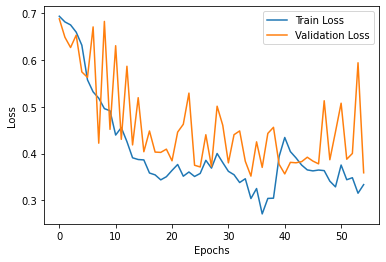

In [ ]:
plt.figure()
plt.plot(history_best_tuned.history["loss"], label = "Train Loss")
plt.plot(history_best_tuned.history["val_loss"], label = "Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

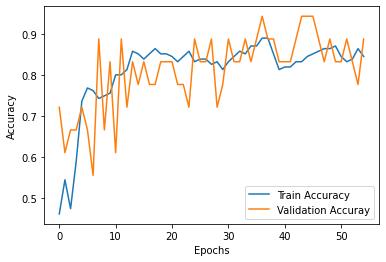

In [ ]:
plt.figure()
plt.plot(history_best_tuned.history["accuracy"], label = "Train Accuracy")
plt.plot(history_best_tuned.history["val_accuracy"], label = "Validation Accuray")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
while True: pass
best_tuned_model.summary()

In [ ]:
best_tuned_model.evaluate(X_test_scaled_m_m, y_test)

2/2 [==============================] - 1s 12ms/step - loss: 0.3532 - accuracy: 0.8305


[0.35322144627571106, 0.8305084705352783]

In [ ]:
#best_tuned_model.save('best_tuned_model_nomm_1.h5')

In [62]:
best_tuned_saved_model = load_model('/content/drive/My Drive/Thesis/NeuralNetworks/LSTM/Daily/best_tuned_model_nomm_1.h5')

In [63]:
best_tuned_saved_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 128)               66560     
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               16512     
                                                                 
 dense_19 (Dense)            (None, 1)                 129       
                                                                 
Total params: 83,201
Trainable params: 83,201
Non-trainable params: 0
_________________________________________________________________


In [64]:
best_tuned_saved_model.evaluate(X_train_scaled_m_m, y_train)

6/6 [==============================] - 6s 6ms/step - loss: 0.3920 - accuracy: 0.8333


[0.3920411765575409, 0.8333333134651184]

In [65]:
best_tuned_saved_model.evaluate(X_test_scaled_m_m, y_test)

2/2 [==============================] - 1s 8ms/step - loss: 0.3308 - accuracy: 0.8475


[0.3308279514312744, 0.8474576473236084]

P-R AUC 0.9450884739912503
ROC AUC 0.945852534562212


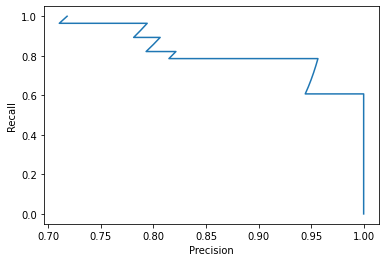

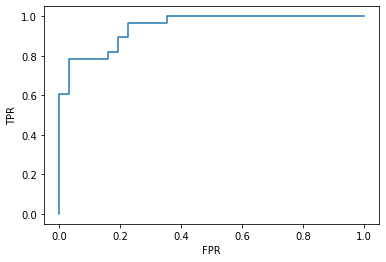

In [66]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

probs = best_tuned_saved_model.predict(X_test_scaled_m_m).ravel()
y_test_pr = y_test[np.isnan(probs)==False]
probs = probs[np.isnan(probs)==False]
precisions, recalls, threshholds = precision_recall_curve(y_test_pr, probs)
plt.figure()
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
print("P-R AUC", auc( recalls, precisions))
fpr, tpr, thresholds = roc_curve(y_test_pr, probs, pos_label=1)
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
print("ROC AUC", auc( fpr, tpr))

In [ ]:
## DATA LEAKAGE TRIAL
[0,0,1] Kristiine, Mustamae, Annelinn

In [ ]:
X_train_scaled_m_m

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119
0,0.825032,0.832321,0.569855,0.624094,0.762276,0.577981,0.733315,0.831838,0.484213,0.822719,1.000000,0.821831,0.333190,0.316835,0.265248,0.526146,0.633669,0.492325,0.539692,0.359303,0.568549,0.507792,0.522253,0.572860,0.441719,0.806247,0.654466,0.511162,0.790675,0.387284,0.716803,0.846063,0.665491,0.876879,0.671252,0.569829,0.353516,0.478740,0.645896,0.401915,0.625648,0.516061,0.558543,0.305078,0.567870,0.300101,0.516767,0.432992,0.629815,0.343118,0.492600,0.513449,0.856200,0.510300,0.496140,0.313843,0.285979,0.565571,0.237724,0.308892,0.290734,0.571423,0.419276,0.459537,0.214680,0.378271,0.605021,0.502972,0.555381,0.271688,0.490915,0.250513,0.287939,0.262466,0.278677,0.249833,0.169469,0.309558,0.361798,0.149064,0.300479,0.196183,0.366867,0.110018,0.273112,0.335606,0.209638,0.388173,0.410471,0.424632,0.339852,0.364189,0.260532,0.224739,0.413176,0.418205,0.317279,0.177921,0.257136,0.258468,0.273269,0.045355,0.048830,0.161200,0.422045,0.060835,0.204374,0.106831,0.034095,0.000000,0.104362,0.067863,0.175791,0.072213,0.065094,0.081266,0.028830,0.111899,0.013037,0.085499
1,0.093107,0.414646,0.446030,0.213488,0.458547,0.497441,0.169849,0.535849,0.489184,0.473342,0.505735,0.772352,0.243602,0.210312,0.557743,0.505548,0.405903,0.425705,0.426751,0.627984,0.176126,0.562451,0.727293,0.469157,0.407996,0.544517,0.411620,0.102485,0.140818,0.723744,0.413973,0.918364,0.444723,0.897814,0.297403,0.310293,0.850962,0.433103,0.505698,0.303755,0.535064,0.323669,0.560209,0.598057,0.524566,0.426191,0.461610,0.402877,0.492472,0.181356,0.581319,0.489557,0.596114,0.633178,0.501401,0.091239,0.438819,0.616477,0.567495,0.281263,0.351691,0.277601,0.000000,0.301663,0.464188,0.681338,0.413787,0.934504,0.316570,0.124229,0.465160,1.000000,0.285149,0.488100,0.455221,0.565552,0.175304,0.197160,0.921614,0.444760,0.403064,0.701962,0.355128,0.244125,0.397534,0.859107,0.419017,0.381842,0.436428,0.472184,0.509845,0.404894,0.816028,0.547207,0.340669,0.188829,0.294414,0.571866,0.432132,0.454698,0.500691,0.359574,0.357855,0.291575,0.491948,0.355987,0.442481,0.436914,0.496058,0.409639,0.217784,0.526210,0.098375,0.420624,0.368952,0.252905,0.151280,0.174071,0.224173,0.215393
2,0.846231,0.982949,1.000000,0.626565,0.622587,0.780445,0.862670,0.857135,0.655716,0.682476,0.970042,0.807316,0.211794,0.491210,0.570292,0.584145,0.482503,0.503394,0.350598,0.466064,0.674965,0.762559,0.720278,0.449736,0.423922,0.753380,0.567705,0.737413,0.673658,0.599305,0.618887,0.619777,0.756690,0.702531,0.917135,0.827789,0.597663,0.506120,0.661780,0.431349,0.416606,0.418470,0.466620,0.584979,0.234687,0.167399,0.155355,0.324033,0.286398,0.527983,0.552879,0.444951,0.382726,0.532684,0.395549,0.511516,0.316412,0.700556,0.374437,0.272684,0.349624,0.263561,0.452517,0.586704,0.412935,0.424145,0.609513,0.432990,0.418804,0.434437,0.577997,0.404395,0.082058,0.112823,0.212128,0.281697,0.153380,0.331071,0.281363,0.206759,0.059917,0.160612,0.055828,0.315633,0.498860,0.619277,0.250376,0.430264,0.658776,0.495410,0.573241,0.604061,0.465174,0.459805,0.417858,0.302921,0.088373,0.339805,0.236106,0.513408,0.088373,0.191599,0.252239,0.157330,0.327455,0.291599,0.290431,0.153157,0.194465,0.000000,0.016189,0.132267,0.285981,0.234743,0.212323,0.130097,0.328512,0.160834,0.238748,0.171460
3,0.553819,0.903262,0.541996,0.456187,0.486709,0.663611,0.696844,0.840820,0.694301,0.843643,1.000000,0.904855,0.438969,0.440702,0.585711,0.564748,0.401962,0.634234,0.338542,0.325908,0.430500,0.461861,0.521788,0.231909,0.312938,0.502893,0.310647,0.386393,0.465327,0.348855,0.379825,0.512815,0.492076,0.515163,0.587640,0.509433,0.423820,0.351287,0.404226,0.376890,0.345893,0.325209,0.1

In [ ]:
y_train[0]

array([1.])

In [ ]:
encoded_train = y_train.copy()
encoded_train = np.append(encoded_train, np.zeros_like(encoded_train), axis=1)
for i in np.arange(len(encoded_train)):
   encoded_train[i][1] = np.abs(encoded_train[i][0]-1)
encoded_test = y_test.copy()
encoded_test = np.append(encoded_test, np.zeros_like(encoded_test), axis=1)
for i in np.arange(len(encoded_test)):
   encoded_test[i][1] = np.abs(encoded_test[i][0]-1)

In [ ]:
X_train_2 = np.append(np.array(X_train_scaled_m_m), encoded_train, axis = 1)
X_test_2 = np.append(np.array(X_test_scaled_m_m), encoded_test, axis = 1)
X_train_2

array([[0.82503168, 0.83232094, 0.56985539, ..., 0.08549856, 1.        ,
        0.        ],
       [0.09310667, 0.41464599, 0.44603026, ..., 0.21539324, 1.        ,
        0.        ],
       [0.84623088, 0.98294854, 1.        , ..., 0.17146036, 1.        ,
        0.        ],
       ...,
       [0.87511826, 0.87038789, 0.91579943, ..., 0.        , 0.        ,
        1.        ],
       [0.65744186, 0.53697674, 0.21162791, ..., 0.15069767, 1.        ,
        0.        ],
       [0.99065946, 0.51406707, 0.50517668, ..., 0.72147198, 0.        ,
        1.        ]])

In [ ]:
# Only return sequences if next layer is also LSTM!!
model_2 = Sequential()
model_2.add(LSTM(128, input_shape=(122,n_features))) # This number 8 ballpark
model_2.add(Dropout(0))
model_2.add(Dense(128, activation='relu')) # This number 8 ballpark
model_2.add(Dense(n_outputs, activation='sigmoid'))


In [ ]:
model_2.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=METRICS)

In [ ]:
history_2 = model_2.fit(np.array(X_train_2), y_train, epochs=epochs, verbose=verbose, batch_size = batch_size, validation_split=0.1, callbacks = [es])

Epoch 1/300
7/7 [==============================] - 4s 281ms/step - loss: 0.6925 - tp: 13.0000 - fp: 16.0000 - tn: 73.0000 - fn: 72.0000 - accuracy: 0.4943 - precision: 0.4483 - recall: 0.1529 - auc: 0.6573 - prc: 0.5908 - val_loss: 0.6698 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 12.0000 - val_fn: 6.0000 - val_accuracy: 0.6667 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.9306 - val_prc: 0.8579
Epoch 2/300
7/7 [==============================] - 0s 18ms/step - loss: 0.6808 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 77.0000 - fn: 79.0000 - accuracy: 0.4936 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.9201 - prc: 0.9301 - val_loss: 0.6526 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 12.0000 - val_fn: 6.0000 - val_accuracy: 0.6667 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.9444 - val_prc: 0.8595
Epoch 3/300
7/7 [==============================] - 0s 17ms/step - loss: 0.6670 - tp: 2.0000 - fp: 0.0000e+00 - tn: 77.0000 - fn: 77

In [ ]:
model_2.evaluate(X_test_2, y_test)

2/2 [==============================] - 1s 12ms/step - loss: 3.8478e-05 - tp: 28.0000 - fp: 0.0000e+00 - tn: 31.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - prc: 1.0000


[3.84781596949324e-05, 28.0, 0.0, 31.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [ ]:
## Tweak things


In [ ]:
np.sum(y_train == 1)

85

In [ ]:
encoded_train_3 = y_train.copy()
encoded_train_3
encoded_train_3 = np.append(np.zeros((len(encoded_train_3), np.sum(y_train == 1))), encoded_train_3, axis=1)
encoded_test_3 = y_test.copy()
encoded_test_3
np.append(np.zeros((len(np.array(encoded_test_3)), np.sum(y_test == 1))), np.array(encoded_test_3), axis=1)

TypeError: ignored

In [ ]:
for r in np.arange(len(encoded_train_3)):
  if encoded_train_3[r,-1] != 1:
    one_i = np.random.randint(encoded_train_3.shape[1])
    encoded_train_3[r,one_i] = 1



In [ ]:
np.sum(encoded_train_3, axis = 0)

array([ 2.,  2.,  1.,  2.,  0.,  1.,  1.,  0.,  0.,  2.,  1.,  0.,  2.,
        0.,  0.,  2.,  2.,  1.,  2.,  2.,  0.,  1.,  1.,  2.,  3.,  1.,
        1.,  1.,  0.,  3.,  1.,  0.,  1.,  2.,  1.,  0.,  1.,  1.,  1.,
        1.,  1.,  2.,  1.,  2.,  1.,  4.,  0.,  0.,  0.,  0.,  2.,  1.,
        2.,  0.,  0.,  0.,  2.,  1.,  4.,  2.,  0.,  3.,  0.,  0.,  0.,
        0.,  2.,  1.,  1.,  0.,  0.,  2.,  0.,  0.,  1.,  1.,  1.,  1.,
        1.,  0.,  2.,  2.,  0.,  0.,  1., 85.])